In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import json
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

%matplotlib inline


In [2]:
df_metrics = pd.read_csv('metrics_compact.csv')
df_metrics.fillna(value = 0, inplace=True)
#df_metrics['rating'].fillna(value = df_metrics['rating'].mean(), inplace=True)
df_metrics.head()

,usergroup,chat_id,conv_id,RR,RD,rating,duration,initiatedByUser,length,turnsByUser,numWords
0,default,95008127,1,1.0,9.50,4.0,23,True,8,3,0.0
1,default,95008127,2,1.0,11.00,5.0,77,True,8,3,2.0
2,default,95008127,3,1.0,19.67,4.0,66,False,11,4,0.0
3,default,95008127,4,1.0,164.00,5.0,844,True,9,4,4.0
4,default,95008127,5,1.0,152.67,4.0,490,True,11,5,4.0


In [3]:
df_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 11 columns):
usergroup          762 non-null object
chat_id            762 non-null int64
conv_id            762 non-null int64
RR                 762 non-null float64
RD                 762 non-null float64
rating             762 non-null float64
duration           762 non-null int64
initiatedByUser    762 non-null bool
length             762 non-null int64
turnsByUser        762 non-null int64
numWords           762 non-null float64
dtypes: bool(1), float64(4), int64(5), object(1)
memory usage: 60.4+ KB


In [4]:
df_metrics['encoded_ug'] = pd.get_dummies(df_metrics['usergroup'],drop_first=True)
df_metrics.head()

,usergroup,chat_id,conv_id,RR,RD,rating,duration,initiatedByUser,length,turnsByUser,numWords,encoded_ug
0,default,95008127,1,1.0,9.50,4.0,23,True,8,3,0.0,1
1,default,95008127,2,1.0,11.00,5.0,77,True,8,3,2.0,1
2,default,95008127,3,1.0,19.67,4.0,66,False,11,4,0.0,1
3,default,95008127,4,1.0,164.00,5.0,844,True,9,4,4.0,1
4,default,95008127,5,1.0,152.67,4.0,490,True,11,5,4.0,1


<Figure size 720x720 with 0 Axes>

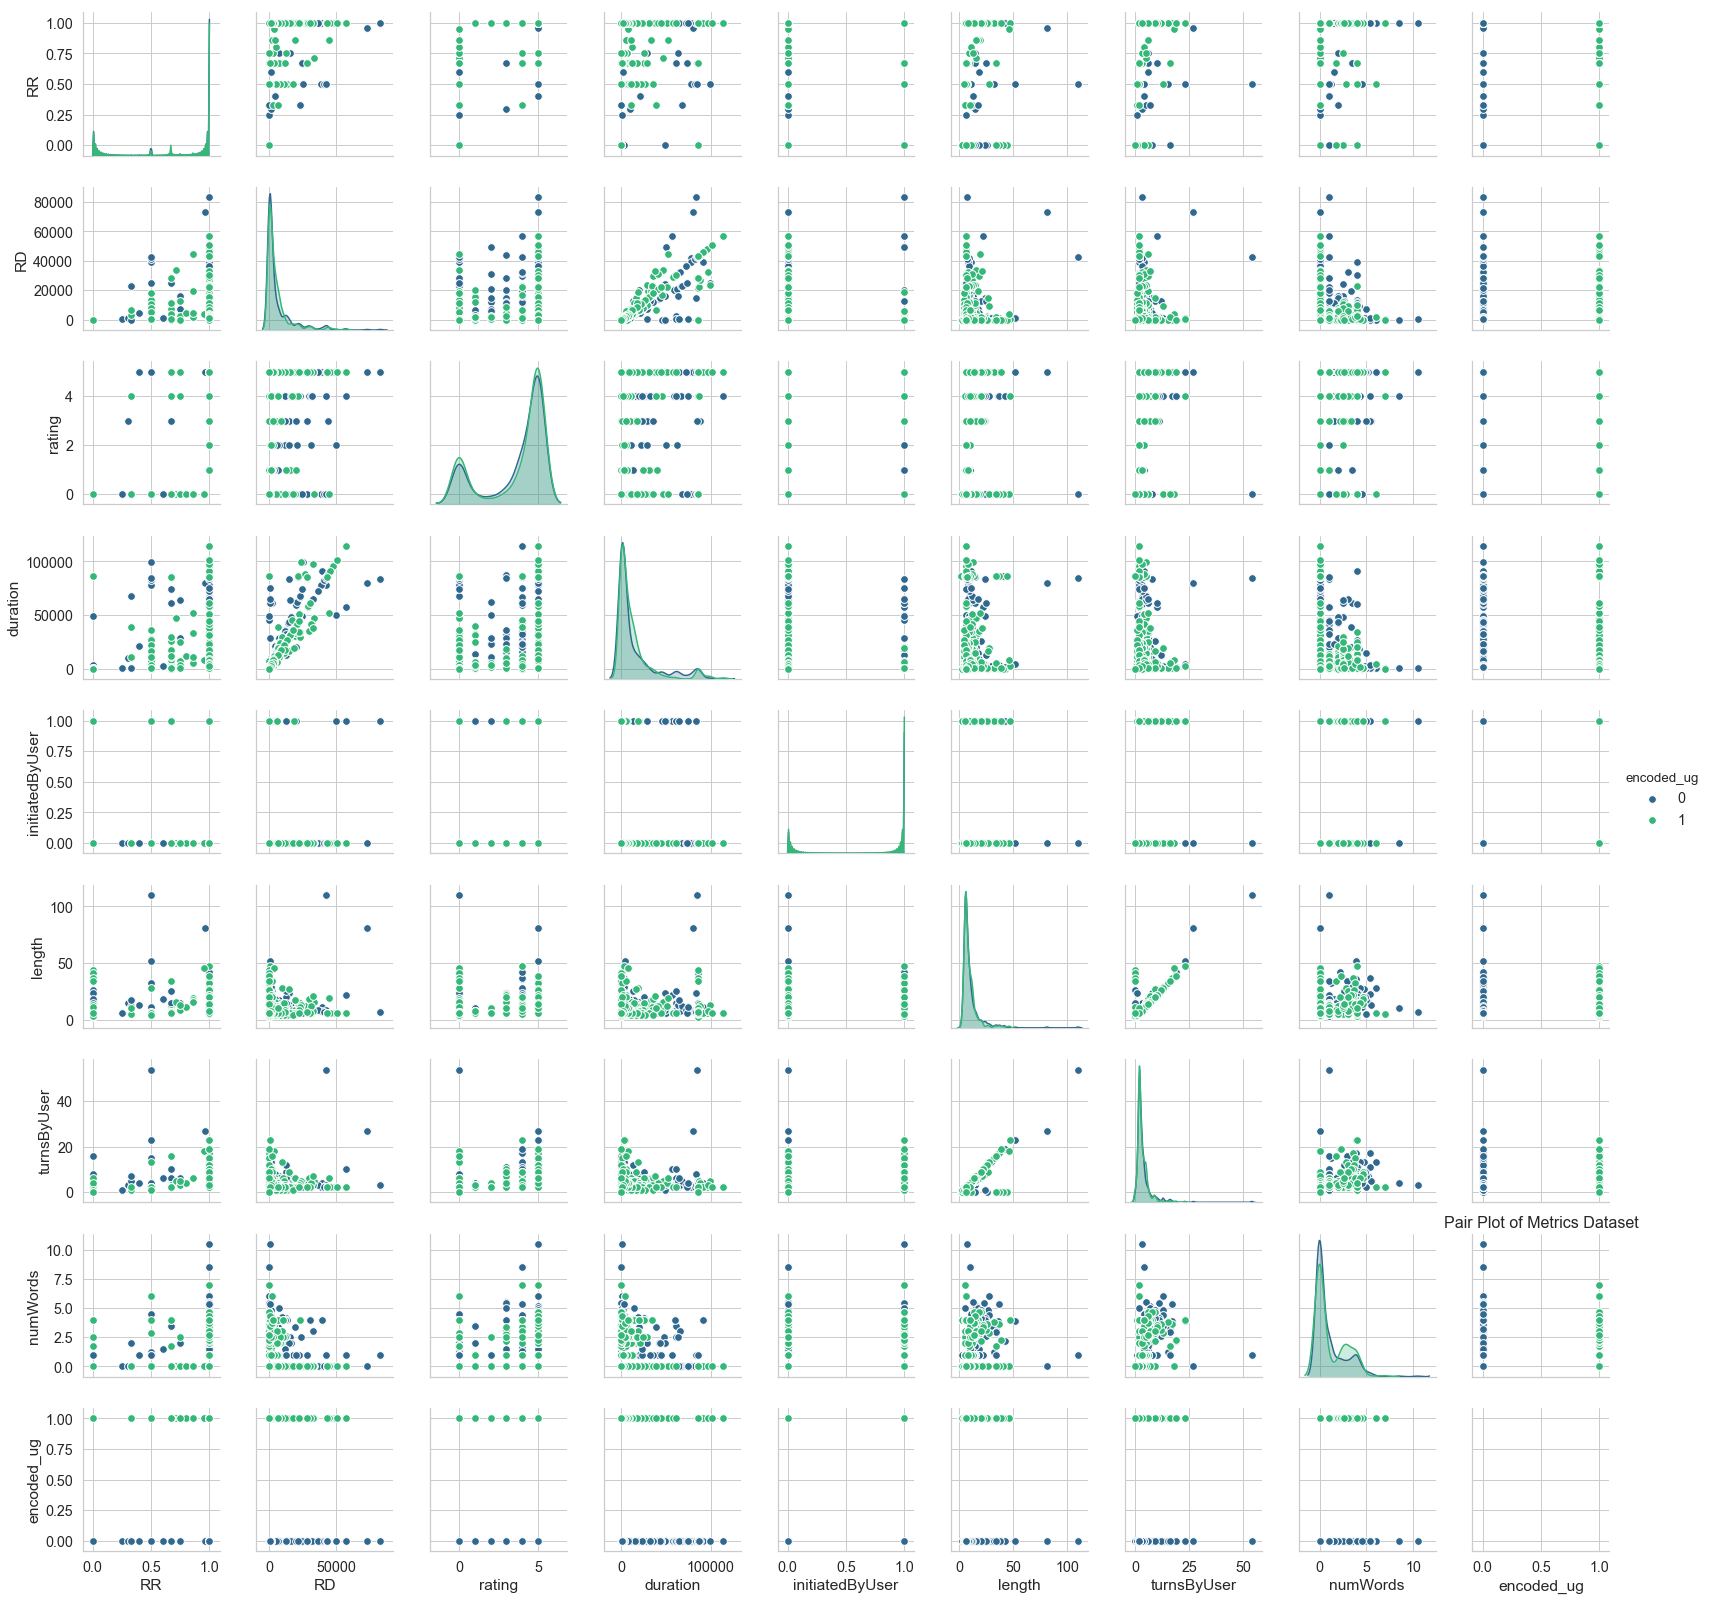

In [6]:
plt.figure(figsize=(10, 10))

sns.set(font_scale = 1.3)
sns.set_style("whitegrid")


pair = sns.pairplot(df_metrics.drop(['usergroup', 'chat_id', 'conv_id'],axis=1),hue='encoded_ug', 
                    plot_kws=dict(s=60, linewidth=1),  
                    palette='viridis')

plt.title("Pair Plot of Metrics Dataset", y=1.025, fontsize = 16)

#pair.savefig("../documentation/images/pair_fig.eps", format='eps', bbox_inches='tight')

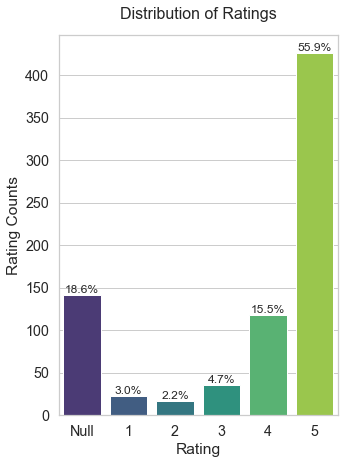

In [10]:
plt.figure(figsize=(5, 7))
sns.set(font_scale = 1.3)
sns.set_style("whitegrid")

rating_counts = sns.countplot(x='rating', data=df_metrics, palette='viridis')
rating_counts.set_xticklabels(["Null","1","2","3","4","5"])
total = float(len(df_metrics))
for p in rating_counts.patches:
    height = p.get_height()
    rating_counts.text(p.get_x()+p.get_width()/2., height + 2,'{0}%'.format(round(height/total*100,1)),
            ha="center", fontsize=12) 

plt.xlabel("Rating")
plt.ylabel("Rating Counts")
plt.title("Distribution of Ratings", y=1.025, fontsize = 16)

rating_dist_fig = rating_counts.get_figure()
#rating_dist_fig.savefig("../documentation/images/rating_dist.eps", format='eps', bbox_inches='tight')

<Figure size 360x504 with 0 Axes>

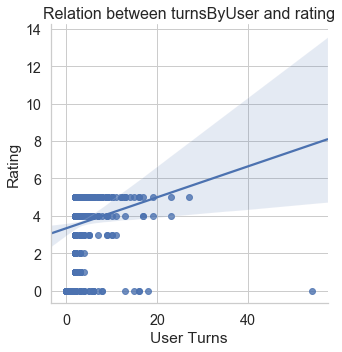

In [15]:
plt.figure(figsize=(5, 7))
sns.set(font_scale = 1.3)
sns.set_style("whitegrid")


lmplot= sns.lmplot(x='turnsByUser', y='rating',data=df_metrics,palette='viridis')
plt.xlabel("User Turns")
plt.ylabel("Rating")
plt.title("Relation between turnsByUser and rating", y=1.025, fontsize = 16)

#lmplot.savefig("../documentation/images/lmplot.png", bbox_inches='tight')


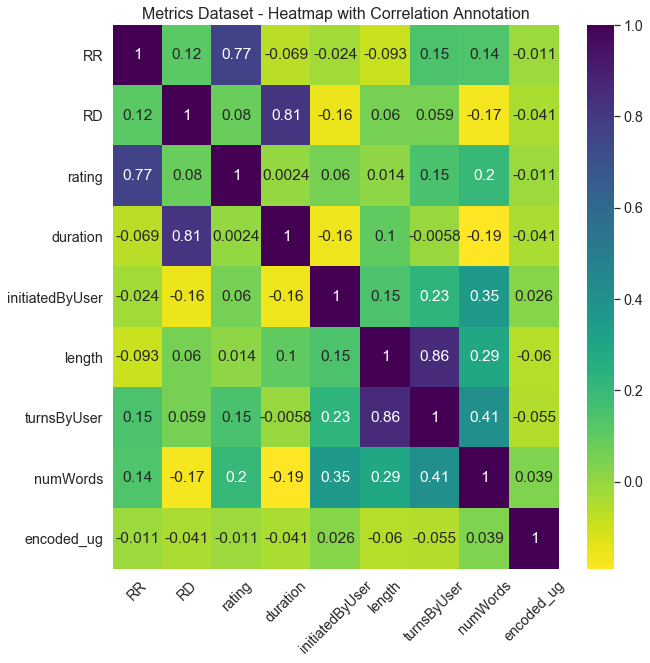

In [17]:
plt.figure(figsize=(10, 10))
sns.set(font_scale = 1.3)
sns.set_style("whitegrid")

metrics_heat =sns.heatmap(df_metrics.drop(['usergroup', 'chat_id', 'conv_id'],axis=1).corr(), annot=True, cmap='viridis_r')
metrics_heat.set_xticklabels(metrics_heat.get_xticklabels(), rotation=45)

plt.title("Metrics Dataset - Heatmap with Correlation Annotation", y=1.025, fontsize = 16)


metrics_heat_fig = metrics_heat.get_figure()
#metrics_heat_fig.savefig("../documentation/images/metrics_heat.eps", format='eps', bbox_inches='tight')

In [101]:
#df_metrics.drop(['chat_id','conv_id'],axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df_metrics.drop(['rating', 'usergroup', 'chat_id'],axis=1), 
                                                    df_metrics['rating'], test_size=0.3, 
                                                    random_state=102)


In [102]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((533, 9), (229, 9), (533,), (229,))

In [103]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [104]:
print(lm.intercept_)
coeff = pd.DataFrame(lm.coef_, X_train.columns, columns=['Coefficient'])
coeff

-2.267672814386154


,Coefficient
conv_id,-0.011138
RR,6.579534
RD,-0.000025
duration,0.000014
initiatedByUser,0.237836
length,0.041676
turnsByUser,-0.089114
numWords,0.123097
encoded_ug,0.022195


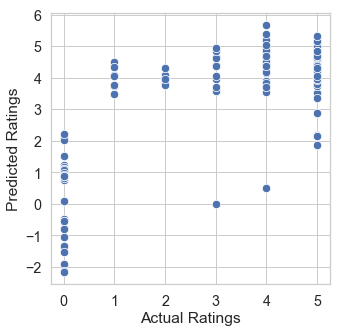

In [105]:
y_pred = lm.predict(X_test)

plt.figure(figsize=(5,5))
sns.set(font_scale = 1.3)
sns.set_style("whitegrid")

linearreg=sns.scatterplot(x=y_test, y=y_pred, palette='viridis',  s=70)

plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
#plt.title("Linear Regression", y=1.025, fontsize = 16, loc='right')

linearreg_fig = linearreg.get_figure()
#linearreg_fig.savefig("../documentation/images/linearreg.eps", format='eps', bbox_inches='tight')

/Users/pinarkaymaz/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


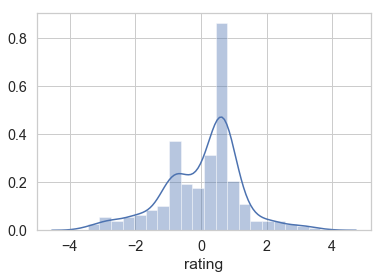

In [91]:
sns.distplot((y_test-y_pred),bins=20)

In [77]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#df

In [106]:
print("RMSE: ",np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print("R2: ",metrics.r2_score(y_test, y_pred, multioutput='variance_weighted'))

RMSE:  0.9682894569046159
R2:  0.655253229010393


### Save Model

In [25]:
filename = 'best_linreg.sav'

In [12]:
best_regressor= lm
pickle.dump(best_regressor, open(filename, 'wb'))

### Restore Model

In [109]:
loaded_model = pickle.load(open(filename, 'rb'))

y_pred_best = loaded_model.predict(X_test)
print("RMSE: ",np.sqrt(metrics.mean_absolute_error(y_test, y_pred_best)))
print("R2: ",metrics.r2_score(y_test, y_pred_best, multioutput='variance_weighted'))

RMSE:  0.9900407865570835
R2:  0.6502938991615461


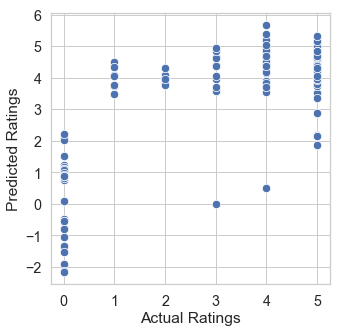

In [108]:


plt.figure(figsize=(5,5))
sns.set(font_scale = 1.3)
sns.set_style("whitegrid")

linearreg=sns.scatterplot(x=y_test, y=y_pred_best, palette='viridis',  s=70)

plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
#plt.title("Linear Regression", y=1.025, fontsize = 16, loc='right')

linearreg_fig = linearreg.get_figure()
#linearreg_fig.savefig("../documentation/images/linearreg.eps", format='eps', bbox_inches='tight')

## Correlations by User Group

In [5]:
df_default = df_metrics[df_metrics['usergroup']=='default']
df_custom= df_metrics[df_metrics['usergroup']=='custom']


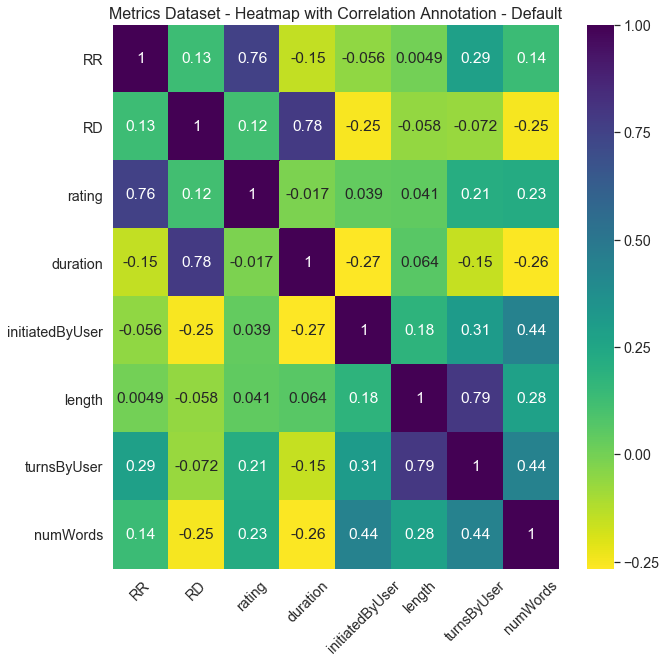

In [10]:
plt.figure(figsize=(10, 10))
sns.set(font_scale = 1.3)
sns.set_style("whitegrid")

corr_default =sns.heatmap(df_default.drop(['usergroup', 'chat_id', 'conv_id', 'encoded_ug'],axis=1).corr(), annot=True, cmap='viridis_r')
corr_default.set_xticklabels(corr_default.get_xticklabels(), rotation=45)

plt.title("Metrics Dataset - Heatmap with Correlation Annotation - Default", y=1.025, fontsize = 16)

metrics_heat_default_fig = corr_default.get_figure()
#metrics_heat_default_fig.savefig("../documentation/images/metrics_heat_default.eps", format='eps', bbox_inches='tight')

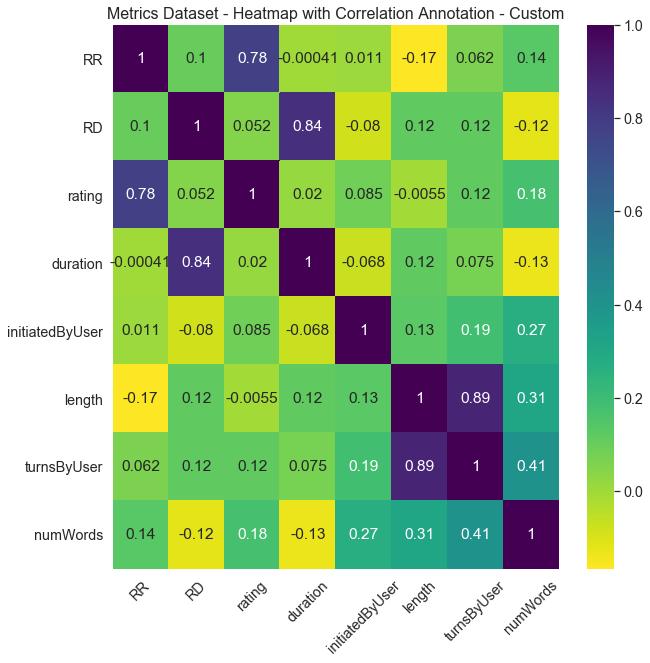

In [11]:
plt.figure(figsize=(10, 10))
sns.set(font_scale = 1.3)
sns.set_style("whitegrid")

corr_custom =sns.heatmap(df_custom.drop(['usergroup', 'chat_id', 'conv_id', 'encoded_ug'],axis=1).corr(), annot=True, cmap='viridis_r')
corr_custom.set_xticklabels(corr_custom.get_xticklabels(), rotation=45)

plt.title("Metrics Dataset - Heatmap with Correlation Annotation - Custom", y=1.025, fontsize = 16)

metrics_heat_custom_fig = corr_custom.get_figure()
#metrics_heat_custom_fig.savefig("../documentation/images/metrics_heat_custom.eps", format='eps', bbox_inches='tight')